# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv(r"F:\Datasets\Machine Learning (Codes and Data Files)\Data\MBA Salary.csv")

In [4]:
len(df)

50

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
S. No.                    50 non-null int64
Percentage in Grade 10    50 non-null float64
Salary                    50 non-null int64
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


In [7]:
df.describe()

,S. No.,Percentage in Grade 10,Salary
count,50.00000,50.000000,50.000000
mean,25.50000,63.922400,258192.000000
std,14.57738,9.859937,76715.790993
min,1.00000,37.330000,120000.000000
25%,13.25000,57.685000,204500.000000
50%,25.50000,64.700000,250000.000000
75%,37.75000,70.000000,300000.000000
max,50.00000,83.000000,450000.000000


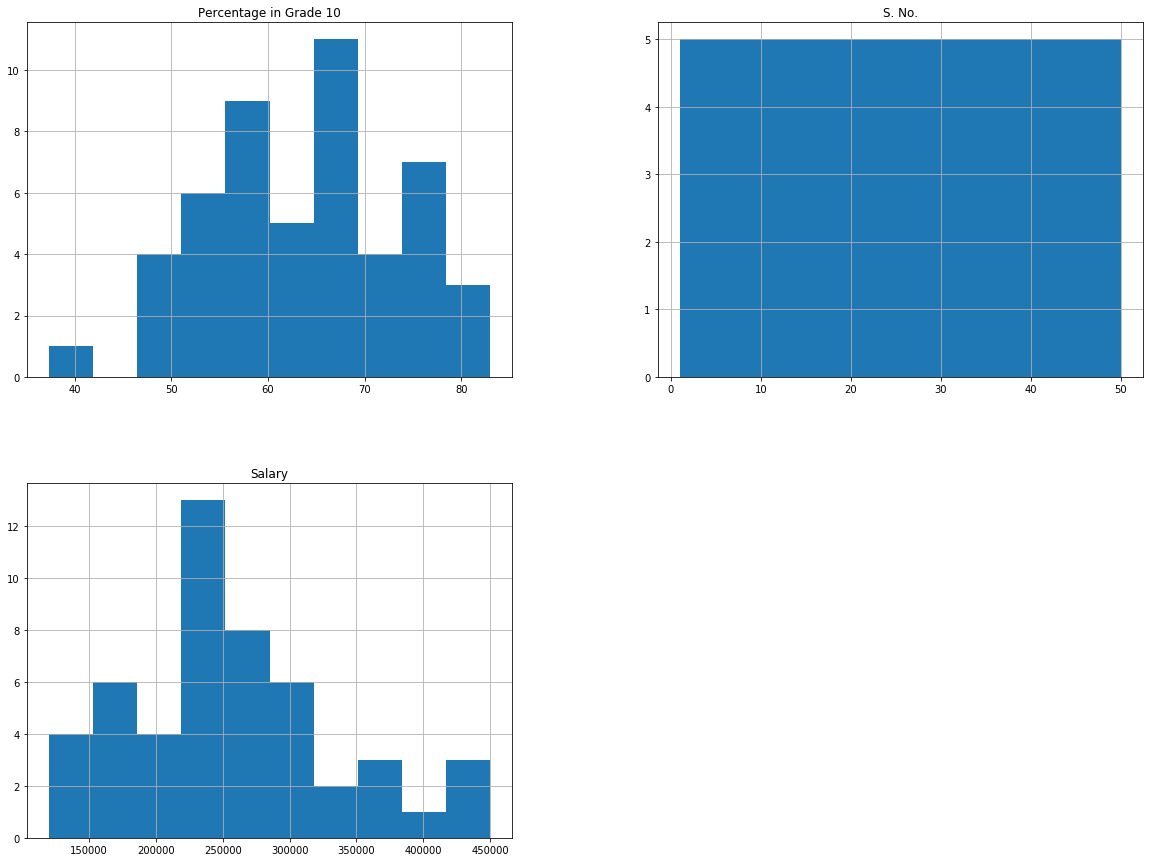

In [12]:
df.hist(figsize=(20,15))
plt.show()

# Building the SLM

In [13]:
import statsmodels.api as sm

## Adding Values for X and Y

In [14]:
X = sm.add_constant(df["Percentage in Grade 10"] ) 

C:\Users\LENOVO\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [17]:
X.head()

,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [18]:
Y = df["Salary"]

In [19]:
Y.head()

0    270000
1    200000
2    240000
3    250000
4    180000
Name: Salary, dtype: int64

#  Splitting the Dataset into Training and Validation Sets

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train_X, test_X, train_y, test_y = train_test_split( X, Y, train_size = 0.8, random_state = 100 )

##  Fitting the Model using ols method

In [22]:
mba_salary_lm = sm.OLS( train_y, train_X ).fit()

In [24]:
mba_salary_lm.params

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64

#  MODEL DIAGNOSTICS
It is important to validate the regression model to ensure its validity and goodness of fit before it 
can be used for practical applications. The following measures are used to validate the simple linear 
regression models:
1. Co-efficient of determination (R-squared).
2. Hypothesis test for the regression coefficient.
3. Analysis of variance for overall model validity (important for multiple linear regression).
4. Residual analysis to validate the regression model assumptions.
5. Outlier analysis, since the presence of outliers can significantly impact the regression parameters.

In [25]:
mba_salary_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2021-07-07 02:03      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8089 176079.3802
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================

"""

From the summary output shown above, we can infer the following:
1. The model R-squared value is 0.211, that is, the model explains 21.1% of the variation in salary. 
2. The p-value for the t-test is 0.0029 which indicates that there is a statistically significant relationship (at significance value a = 0.05) between the feature, percentage in grade 10, and salary. 
Also, the probability value of F-statistic of the model is 0.0029 which indicates that the overall 
model is statistically significant. Note that, in a simple linear regression, the p-value for t-test and 
F-test will be the same since the null hypothesis is the same. (Also F = t2 in the case of SLR.)


The co-efficient of determination (R-squared) has the following properties:
1. The value of R-squared lies between 0 and 1.
2. Mathematically, R-squared (R2
) is square of correlation coefficient (R2
 = r2
), where r is the 
Pearson correlation co-efficient.
3. Higher R-squared indicates better fit; however, one should be careful about the spurious 
relationship. 

##  Residual Analysis

Residuals or errors are the difference between the actual value of the outcome variable and the predicted 
value ( ) Y Y i i -  . Residual (error) analysis is important to check whether the assumptions of regression 
models have been satisfied. It is performed to check the following:
1. The residuals are normally distributed.
2. Variance of residual is constant (homoscedasticity).
3. The functional form of regression is correctly specified.
4. THere are no outliers.

### 1)  Check for Normal Distribution of Residual

In [27]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

<Figure size 576x432 with 0 Axes>

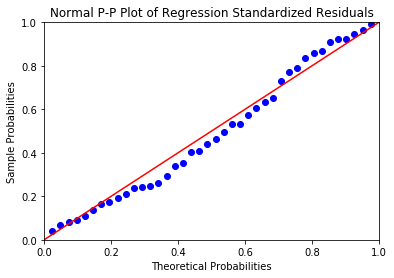

In [31]:
mba_salary_resid = mba_salary_lm.resid 
probplot = sm.ProbPlot(mba_salary_resid) 
plt.figure( figsize = (8, 6)) 
probplot.ppplot( line="45" )
plt.title( "Normal P-P Plot of Regression Standardized Residuals" )
plt.show()

The normality of residuals can be checked using the probability−probability plot (P-P plot). P-P plot
compares the cumulative distribution function of two probability distributions against each other. In 
the current context, we use the P-P plot to check whether the distribution of the residuals matches with
that of a normal distribution. In Python, ProbPlot() method on statsmodel draws the P-P plot as shown
in Figure

In Figure, the diagonal line is the cumulative distribution of a normal distribution, whereas the dots 
represent the cumulative distribution of the residuals. Since the dots are close to the diagonal line, we can 
conclude that the residuals follow an approximate normal distribution (we need only an approximate 
normal distribution).

### 2)  Test of Homoscedasticity

An important assumption of the regression model is that the residuals have constant variance 
(homoscedasticity) across different values of the predicted value (Y). The homoscedasticity can be 
observed by drawing a residual plot, which is a plot between standardized residual value and standardized predicted value. If there is heteroscedasticity (non-constant variance of residuals), then a 
funnel type shape in the residual plot can be expected. A non-constant variance of the residuals is 
known as heteroscedasticity.
The following custom method get_standardized_values() creates the standardized values of 
a series of values (variable). It subtracts values from mean and divides by standard deviation of 
the variable.

In [33]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

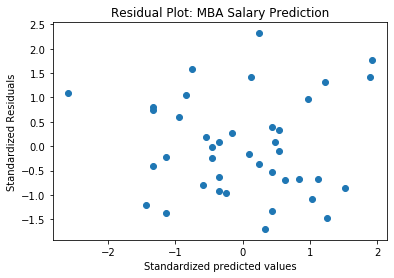

In [34]:
plt.scatter( get_standardized_values( mba_salary_lm.fittedvalues ), 
get_standardized_values( mba_salary_resid ))
plt.title( "Residual Plot: MBA Salary Prediction"); 
plt.xlabel( "Standardized predicted values" )
plt.ylabel( "Standardized Residuals" );

It can be observed in Figure that the residuals are random and have no funnel shape, which means 
the residuals have constant variance (homoscedasticity).

### 3) Outlier Analysis

Outliers are observations whose values show a large deviation from the mean value. Presence of an
outlier can have a significant influence on the values of regression coefficients. Thus, it is important to 
identify the existence of outliers in the data.
The following distance measures are useful in identifying influential observations:
1. Z-Score
2. Mahalanobis Distance
3. Cook’s Distance
4. Leverage Values

#### a)  Z-Score

In [36]:
from scipy.stats import zscore

In [38]:
mba_salary_df = df

In [39]:
mba_salary_df["z_score_salary"] = zscore( mba_salary_df.Salary )

In [41]:
mba_salary_df.head()

,S. No.,Percentage in Grade 10,Salary,z_score_salary
0,1,62.00,270000,0.155481
1,2,76.33,200000,-0.766241
2,3,72.00,240000,-0.239543
3,4,60.00,250000,-0.107868
4,5,61.00,180000,-1.029590


In [42]:
mba_salary_df[ (mba_salary_df.z_score_salary > 3.0) | (mba_salary_df.z_score_salary < -3.0) ]

,S. No.,Percentage in Grade 10,Salary,z_score_salary


So, there are no observations that are outliers as per the Z-score.

#### b) Cook’s Distance

Cook’s distance measures how much the predicted value of the dependent variable changes for all the 
observations in the sample when a particular observation is excluded from the sample for the estimation 
of regression parameters.
A Cook’s distance value of more than 1 indicates highly influential observation. Python code for
calculating Cook’s distance is provided below. In this get_influence() returns the influence of observations 
in the model and cook_distance variable provides Cook’s distance measures. Then the distances can be 
plotted against the observation index to find out which observations are influential. 

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


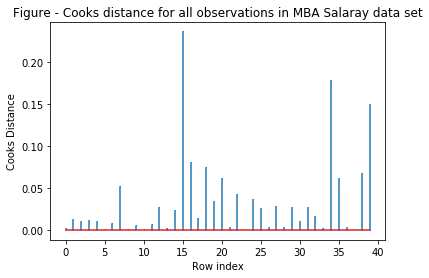

In [46]:
mba_influence = mba_salary_lm.get_influence()
(c, p) = mba_influence.cooks_distance
plt.stem(np.arange( len( train_X) ), np.round( c, 3 ), markerfmt="," )
plt.title( "Figure - Cooks distance for all observations in MBA Salaray data set" )
plt.xlabel("Row index")
plt.ylabel("Cooks Distance")
plt.show()

From Figure, it can be observed that none of the observations’ Cook’s distance exceed 1 and hence 
none of them are outliers.

#### c)  Leverage Values

Leverage value of an observation measures the influence of that observation on the overall fit of the
regression function and is related to the Mahalanobis distance. Leverage value of more than 3(k + 1)/n
is treated as highly influential observation, where k is the number of features in the model and n is the 
sample size.
statsmodels.graphics.regressionplots module provides influence_plot() which draws a plot between 
standardized residuals and leverage value. Mostly, the observations with high leverage value (as mentioned above) and high residuals [more than value 3(k + 1)/n] can be removed from the training

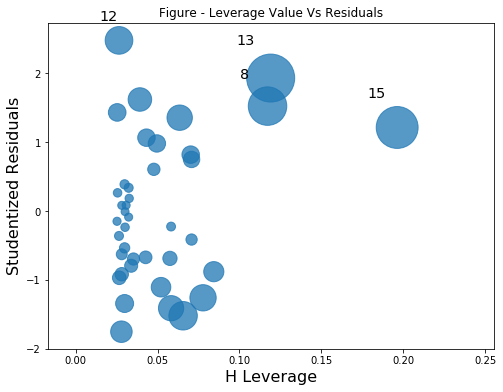

In [47]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots( figsize=(8,6) ) 
influence_plot( mba_salary_lm, ax = ax )
plt.title("Figure - Leverage Value Vs Residuals") 
plt.show()

In Figure, the size of the circle is proportional to the product of residual and leverage value. The 
larger the circle, the larger is the residual and hence influence of the observation.

#  Making Prediction and Measuring Accuracy

Ideally, the prediction should be made on the validation (or test) data and the accuracy of prediction 
should be evaluated. 

### 1) Predicting using the Validation Set

The model variable has a method predict(), which takes the X parameters and returns the predicted values.

In [48]:
pred_y = mba_salary_lm.predict( test_X )

### 2)  Finding R-Squared and RMSE

Several measures can be used for measuring the accuracy of prediction. Mean Square Error (MSE), 
Root Mean Square Error (RMSE) and Mean Absolute Percentage Error (MAPE) are some of the frequently used measures. sklearn.metrics has r2_score and mean_squared_error for measuring R-squared 
and MSE values. We need to take the square root of the MSE value to get RMSE value. Both the methods 
take predicted Y values and actual Y values to calculate the accuracy measures. Numpy module has sqrt 
method to calculate the square root of a value.

In [49]:
from sklearn.metrics import r2_score, mean_squared_error

In [50]:
#r squared
np.abs(r2_score(test_y, pred_y))

0.15664584974230378

So, the model only explains 15.6% of the variance in the validation set.

In [52]:
np.sqrt(mean_squared_error(test_y, pred_y))

73458.04348346894

RMSE means the average error the model makes in predicting the outcome. The smaller the value of 
RMSE, the better the model is.

### 3) Calculating Prediction Intervals
The regression equation gives us the point estimate of the outcome variable for a given value of the 
independent variable. In many applications, we would be interested in knowing the interval estimate of 
Yi for a given value of explanatory variable. wls_prediction_std() returns the prediction interval while 
making a prediction. It takes significance value (a) to calculate the interval. An a-value of 0.1 returns 
the prediction at confidence interval of 90%. The code for calculating prediction interval is as follows:

In [54]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Predict the y values
pred_y = mba_salary_lm.predict( test_X )

# Predict the low and high interval values for y
_, pred_y_low, pred_y_high = wls_prediction_std( mba_salary_lm, test_X, alpha = 0.1)

# Store all the values in a dataframe
pred_y_df = pd.DataFrame( { "grade_10_perc": test_X["Percentage in Grade 10"], "pred_y": pred_y, "pred_y_left": pred_y_low, "pred_y_right": pred_y_high } )

In [55]:
pred_y_df[0:10]

,grade_10_perc,pred_y,pred_y_left,pred_y_right
6,70.0,279828.402452,158379.832044,401276.972860
36,68.0,272707.227686,151576.715020,393837.740352
37,52.0,215737.829560,92950.942395,338524.716726
28,58.0,237101.353858,115806.869618,358395.838097
43,74.5,295851.045675,173266.083342,418436.008008
49,60.8,247070.998530,126117.560983,368024.436076
5,55.0,226419.591709,104507.444388,348331.739030
33,78.0,308313.101515,184450.060488,432176.142542
20,63.0,254904.290772,134057.999258,375750.582286
42,74.4,295494.986937,172941.528691,418048.445182
